In this notebook instead of looking at partial dependence directly from the scores, they will be reframed in terms of probabilities.

The source code of scikit-learn on my machine has been altered to accomodate the increased functionality, this was done so that the 2D and 3D plots would remain easy to render and still contain the useful information such as the data distribution presented as the tick lines along the x-axis. and a book showing the changes made will be uploaded to another notebook. 

In [1]:
import pandas as pd
import numpy as np
from sklearn import cross_validation, metrics   
import matplotlib.pyplot as plt
from IPython.core.display import display, HTML
import operator 
import xgboost as xgb
from xgboost.sklearn import XGBClassifier 
display(HTML("<style>.container { width:100% !important; }</style>"))
%matplotlib inline
trainData = pd.read_csv('1e7data_train.csv', index_col=0)
testData = pd.read_csv('1e7data_holdout.csv', index_col=0)
df = trainData
dftest = testData

feature_names = ['daOverRH1', 'daOverRH2', 'mindaOverRH', 'maxdaOverRH','norm_std_a1',
                 'norm_max_a1', 'norm_std_window10_a1', 'norm_max_window10_a1',
                'norm_std_a2', 'norm_std_window10_a2', 'norm_max_window10_a2', 'norm_max_a2',
                'norm_std_a3', 'norm_max_a3', 'norm_std_window10_a3', 'norm_max_window10_a3', 
                'avg_ecross1', 'std_ecross1', 'min_ecross1', 'max_ecross1', 
                'avg_ecross2', 'std_ecross2', 'max_ecross2', 'min_ecross2',
                'avg_ecross3', 'max_ecross3', 'min_ecross3', 'std_ecross3', 
                'norm_a1_slope', 'norm_a2_slope', 'norm_a3_slope', 'norm_LyapunovTime']

X_train = df[feature_names]

print X_train.head

y_train = df['Stable']
X_test = dftest[feature_names]

model0 = XGBClassifier(colsample_bylevel=1, colsample_bytree=1,
                         n_estimators=5000, gamma=0,
                         max_delta_step=0, missing=None, 
                         reg_alpha=0, reg_lambda=1,
                         scale_pos_weight=1, seed=27,
                        learning_rate=.002, max_depth=8,
                        subsample=.5, min_child_weight=1.2, 
                        objective='binary:logistic', nthread=-1)

model0.fit(X_train, y_train)

/home/tom/anaconda2/envs/py27/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


<bound method DataFrame.head of         daOverRH1  daOverRH2  mindaOverRH  maxdaOverRH  norm_std_a1  \
Sim_ID                                                                
2414     8.989360   6.969123     6.969123     8.989360     0.000112   
4056     5.924768   5.095487     5.095487     5.924768     0.001214   
4855     7.241825   8.398691     7.241825     8.398691     0.000166   
517      8.840869   8.943640     8.840869     8.943640     0.000115   
1520     5.908519   5.085694     5.085694     5.908519     0.000833   
1642     6.610411   5.579675     5.579675     6.610411     0.000198   
841      7.786016   7.394459     7.394459     7.786016     0.000216   
1043     6.454609   6.886928     6.454609     6.886928     0.000934   
681      6.261863   8.669598     6.261863     8.669598     0.000373   
2377     6.348019   5.345056     5.345056     6.348019     0.000429   
798      6.715648   6.632207     6.632207     6.715648     0.001218   
2654     7.210171   5.049521     5.049521    

XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=1,
       gamma=0, learning_rate=0.002, max_delta_step=0, max_depth=8,
       min_child_weight=1.2, missing=None, n_estimators=5000, nthread=-1,
       objective='binary:logistic', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=27, silent=True, subsample=0.5)

In [2]:
# putting the features in order of XGBoosts feature importance rank
imp_vals = model0.booster().get_fscore()
print imp_vals
sorted_vals = sorted(imp_vals.items(), key = operator.itemgetter(1), reverse=True)
feature_names_sorted = []
for scores in sorted_vals: 
    feature_names_sorted.append(scores[0])
    
X_test = dftest[feature_names_sorted]
X_train = df[feature_names_sorted]

X_train = X_train.replace(np.nan, -999)
X_train = X_train.replace(np.inf, -999)

X_test = X_test.replace(np.nan, -999)
X_test = X_test.replace(np.inf, -999)


{'min_ecross2': 7392, 'norm_LyapunovTime': 7650, 'std_ecross1': 4374, 'std_ecross2': 4149, 'std_ecross3': 4401, 'norm_std_a3': 5931, 'norm_std_a2': 6055, 'norm_std_a1': 5112, 'maxdaOverRH': 8093, 'norm_std_window10_a1': 4936, 'norm_std_window10_a2': 5315, 'norm_std_window10_a3': 5552, 'avg_ecross3': 4978, 'avg_ecross2': 5367, 'avg_ecross1': 4552, 'max_ecross1': 3237, 'max_ecross3': 4482, 'max_ecross2': 4341, 'daOverRH2': 8456, 'daOverRH1': 7410, 'norm_a3_slope': 7217, 'norm_a2_slope': 5038, 'norm_max_a1': 5013, 'norm_max_a2': 6786, 'norm_max_a3': 4734, 'mindaOverRH': 8884, 'min_ecross3': 7713, 'norm_a1_slope': 6790, 'min_ecross1': 7005, 'norm_max_window10_a1': 5166, 'norm_max_window10_a3': 6255, 'norm_max_window10_a2': 5350}


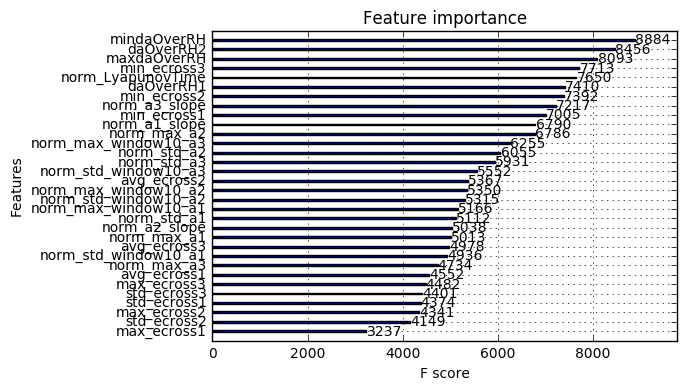

In [3]:
xgb.plot_importance(model0)

In [4]:
from sklearn.ensemble import GradientBoostingClassifier

model = GradientBoostingClassifier(loss='deviance', learning_rate=0.002, n_estimators=5000,
                                  subsample=.5,  min_samples_split=2, 
                                  min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_depth=8,
                                  init=None, random_state=42, 
                                  max_leaf_nodes=8, warm_start=False, max_features=.5)

model.fit(X_train, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.002, loss='deviance', max_depth=8,
              max_features=0.5, max_leaf_nodes=8, min_impurity_split=1e-07,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=5000,
              presort='auto', random_state=42, subsample=0.5, verbose=0,
              warm_start=False)

In [5]:
# with proba as false
from sklearn.ensemble.partial_dependence import plot_partial_dependence # the proba argument has been added to the PPD function

In [6]:
# putting the features in order of XGBoosts feature importance rank

import operator 
imp_vals = model0.booster().get_fscore()
sorted_vals = sorted(imp_vals.items(), key = operator.itemgetter(1), reverse=True)
feature_names_sorted = []
for scores in sorted_vals: 
    feature_names_sorted.append(scores[0])
    
    
X_train = X_train.reindex_axis(feature_names_sorted, axis=1)

Let's first look at what the top 3 features and bottom 3 features look like.

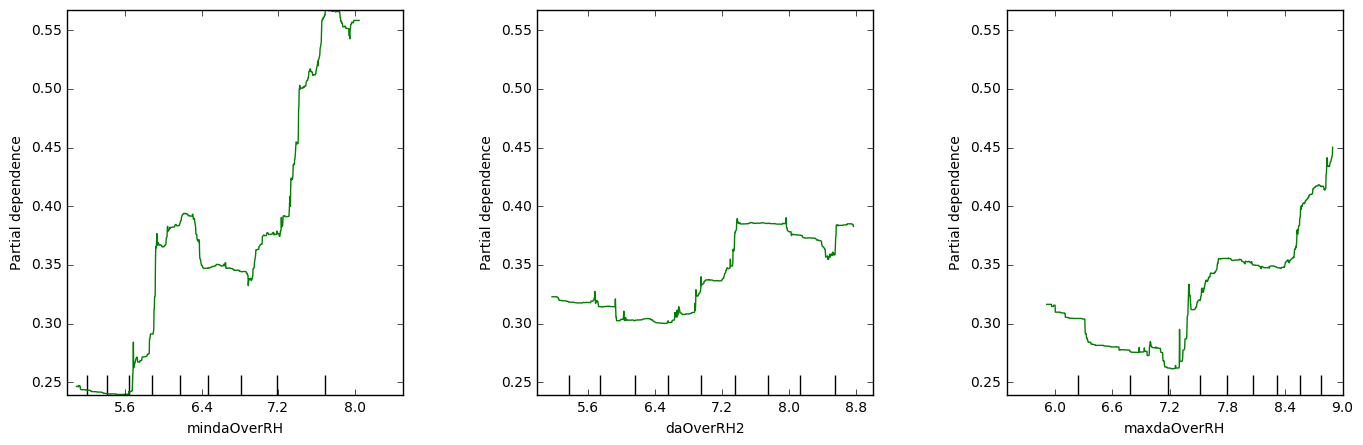

In [7]:
features = [0,1,2] 
names = feature_names_sorted

fig, axs = plot_partial_dependence(model, X_train, features,
                                       feature_names=names,
                                       n_jobs=6, grid_resolution=1000, figsize=(15,7), proba=True)

plt.show()

3


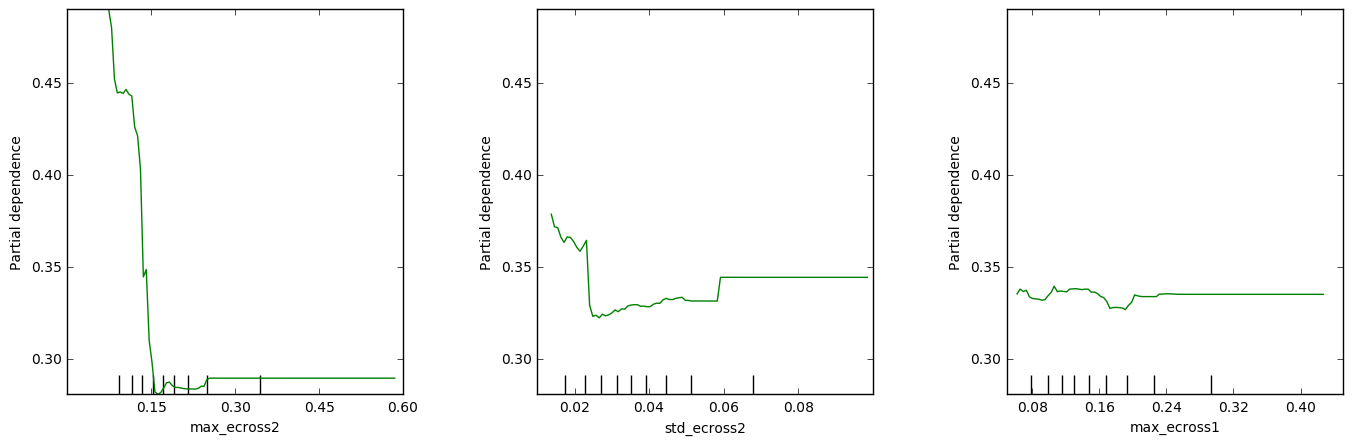

In [8]:
print len(features)

features = [29, 30, 31] 

names = feature_names_sorted

fig, axs = plot_partial_dependence(model, X_train, features,
                                       feature_names=names,
                                       n_jobs=6, grid_resolution=100, figsize=(15,7), proba=True)

plt.show()

From looking at the first set of plots to the second we see that a major difference between them is the decile ticks along the 
x-axis. Deciles are similar to quartiles, while quartiles sort data into four quarters, deciles sort data into ten equal parts.  For example, Australia uses decile ranks to report drought data. Deciles 1-2 represent the lowest 20% (“much below normal”). That means droughts that are “much below normal” don’t occur more than 20% of the time. Source: http://www.statisticshowto.com/decile/

In the plots above the higher scoring features have a more even decile tick distribution. Further more, we see that most of the dependence on max_ecross2, occurs in the first 40% of values, and for mindaOverRH, that the 90th decile is where the data has the most significant effect on the scores.  



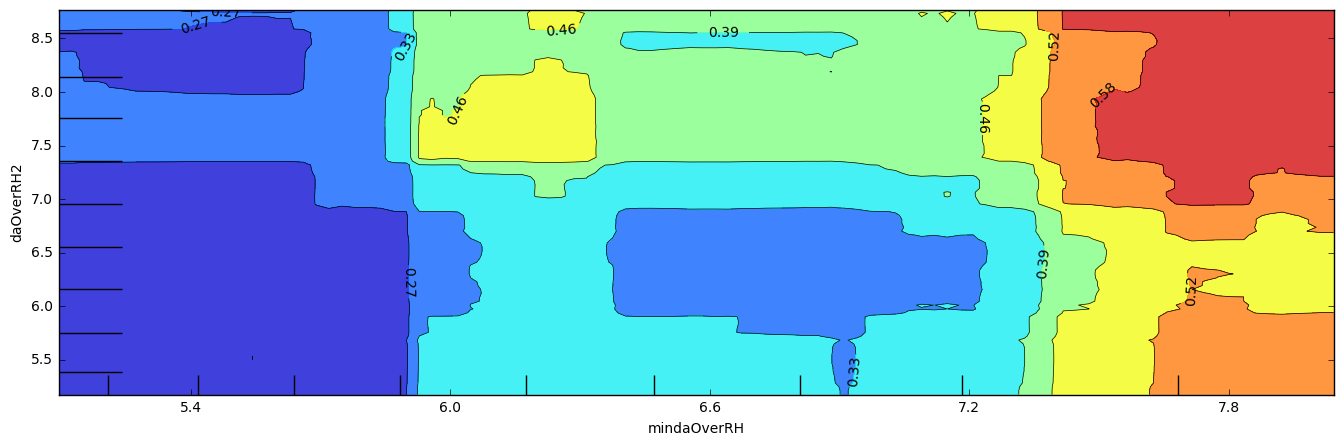

In [9]:
# just a preview of what the options for 3D plotting are

features = [[0,1]] 
names = feature_names_sorted

fig, axs = plot_partial_dependence(model, X_train, features,
                                       feature_names=names,
                                       grid_resolution=100, figsize=(15,7), proba=True)

plt.show()

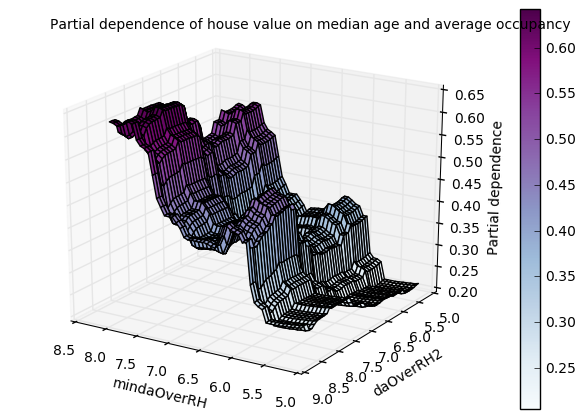

In [10]:
# another method
from sklearn.ensemble.partial_dependence import partial_dependence
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()

target_feature = (0, 1)
pdp, axes = partial_dependence(model, target_variables=target_feature, X=X_train, 
                                   grid_resolution=50, proba=True)
XX, YY = np.meshgrid(axes[0], axes[1])
Z = pdp[0].reshape(list(map(np.size, axes))).T
ax = Axes3D(fig)
surf = ax.plot_surface(XX, YY, Z, rstride=1, cstride=1, cmap=plt.cm.BuPu)
ax.set_xlabel(names[target_feature[0]])
ax.set_ylabel(names[target_feature[1]])
ax.set_zlabel('Partial dependence')
#  pretty init view
ax.view_init(elev=22, azim=122)
plt.colorbar(surf)
plt.suptitle('Partial dependence of house value on median age and '
    'average occupancy')
plt.subplots_adjust(top=0.9)

plt.show()



This relationship is more difficult to see using this format for the 3D plot, in the next cell I implement an interactive plot mode I found online and replot.  

<IPython.core.display.Javascript object>


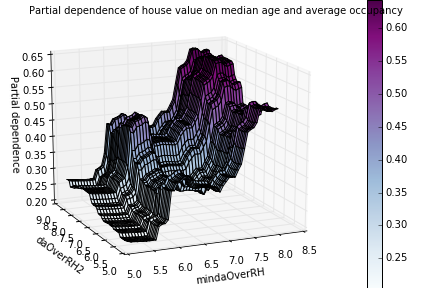

In [11]:
# <<<< NOTE THAT THIS ENABLES PLOT INTERACTIVITY BELOW >>>>>
%matplotlib nbagg    
%matplotlib notebook

# another method
from sklearn.ensemble.partial_dependence import partial_dependence
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()

target_feature = (0, 1)
pdp, axes = partial_dependence(model, target_variables=target_feature, X=X_train, 
                                   grid_resolution=50, proba=True)
XX, YY = np.meshgrid(axes[0], axes[1])
Z = pdp[0].reshape(list(map(np.size, axes))).T
ax = Axes3D(fig)
surf = ax.plot_surface(XX, YY, Z, rstride=1, cstride=1, cmap=plt.cm.BuPu)
ax.set_xlabel(names[target_feature[0]])
ax.set_ylabel(names[target_feature[1]])
ax.set_zlabel('Partial dependence')
#  pretty init view
ax.view_init(elev=22, azim=122)
plt.colorbar(surf)
plt.suptitle('Partial dependence of stability on daOverRH2 and '
    'mindaOverRH')
plt.subplots_adjust(top=0.9)

plt.show()

We see that interactivity enables us to move the plot around to a point where we can actually see a fairly nice 
relationship between the variables. Simply rereun the notebook, and erase the proba arguments above to use with these features however note that we lose the decile ticks. 

Figuring out what the variables mean:

from the notebook it appears that 1 is the inner most planet while 3 is the outermose, so "a2" would refer to 
the second from inner planet and 3 the outermost. 

a = semimajor axis; one half of the major axis

e = eccentricity; how circular the orbit is 

hill radius R(Hill) = a (mp/3 Mstar)1/3; 
The region around a planet within which the planet’s gravity dominates that of the star it orbits

Lyapunov time is the characteristic timescale on which a dynamical system is chaotic, 
it is defined as the time for the distance between nearby trajectories of the system to increase by a factor of e


from the paper: 

 In particular,
we generated features for the standard deviation and
maximum value of each planet’s semimajor axis over
the 104 orbits, normalized to the mean value over the
same period (std ai and max ai, where i denotes the
planet number). We also generated features for these
quantities over only the first 50 orbital periods to capture
variations on orbital timescales (std window ai
and max window ai). Furthermore, we capture any
drifts by generating slope features from linear fits to
each of the three planets’ semimajor axes, normalized
to the mean semimajor axis divided by the integration
time (slope ai). For the eccentricities, we took
the mean, standard deviation, maximum and minimum
values over the full 104 orbits, normalized to the eccentricity
the planet would require to reach its nearest
neighbor’s semimajor axis (avg ei, std ei, max ei,
min ei). For the Lyapunov time we generated a single
feature corresponding to the value measured at the end
of the integration, normalized to the innermost orbital
period (LyapTime). Finally, we added features for the
5
two pairs of initial Hill-radius separations (daOverRH1,
daOverRH2), and for the minimum and maximum initial
Hill-radius separations (mindaOverRH, maxdaOverRH).
We experimented with features describing orbital inclinations,
but they did not significantly improve the models.

Since Lyapunov time calculated using e, time, and distance between nearby trajectories, we should expect it to interact with any of the other variables based on these constants. 

In [12]:
def D3_pdp(target_feature, model, X_train):
    fig = plt.figure()

    pdp, axes = partial_dependence(model, target_variables=target_feature, X=X_train, 
                                   grid_resolution=50, proba=True)
    XX, YY = np.meshgrid(axes[0], axes[1])
    Z = pdp[0].reshape(list(map(np.size, axes))).T
    ax = Axes3D(fig)
    surf = ax.plot_surface(XX, YY, Z, rstride=1, cstride=1, cmap=plt.cm.BuPu)
    ax.set_xlabel(feature_names_sorted[target_feature[0]])
    ax.set_ylabel(feature_names_sorted[target_feature[1]])
    ax.set_zlabel('Partial dependence')
    #  pretty init view
    ax.view_init(elev=22, azim=122)
    plt.colorbar(surf)
    plt.suptitle('Partial dependence of stability on daOverRH2 and '
        'mindaOverRH')
    plt.subplots_adjust(top=0.9)

    plt.show()

<IPython.core.display.Javascript object>


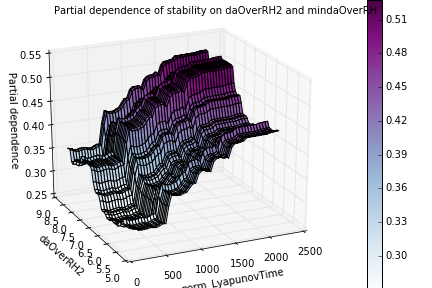

In [13]:
D3_pdp((4, 1), model, X_train)

<IPython.core.display.Javascript object>


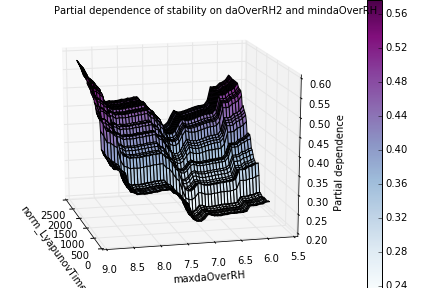

In [14]:
D3_pdp((4, 2), model, X_train)

<IPython.core.display.Javascript object>


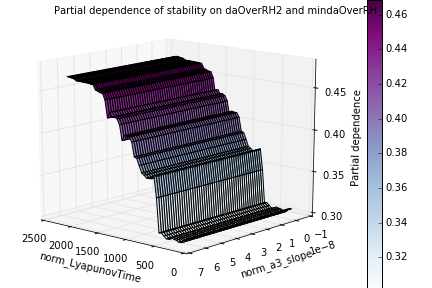

In [18]:
D3_pdp((4, 7), model, X_train)

We see a pretty strong relationship in that last plot. 